# Lab-09-1 ReLU

In [1]:
# parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100

In [3]:
import torchvision.datasets as dsets
import torchvision 
import torch
from torchvision import transforms
import random

device = "cuda" if torch.cuda.is_available() else "cpu"
mnist_train = dsets.MNIST(root="MNIST_data/", download = True, train = True, transform = transforms.ToTensor())
mnist_test = dsets.MNIST(root="MNIST_data/", download = True, train = False, transform = transforms.ToTensor())
data_loader = torch.utils.data.DataLoader(mnist_train, batch_size = batch_size, shuffle=True, drop_last = True)



Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to MNIST_data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST_data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw

Processing...
Done!


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:502: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [4]:
random.seed(777)
torch.manual_seed(777)
if device == "cuda":
  torch.cuda.manual_seed_all(777)

In [5]:
# MNIST data image of shape 28 * 28 = 784
linear = torch.nn.Linear(784, 10, bias = True).to(device)

# Initialization
torch.nn.init.normal_(linear.weight)

# define cost/loss & optimizer
criterion = torch.nn.CrossEntropyLoss().to(device) # Softmax is internally computed
optimizer = torch.optim.Adam(linear.parameters(), lr = learning_rate)


In [6]:
# Train
total_batch = len(data_loader)
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = len(data_loader)

    for X, Y in data_loader:
        # reshape input image into [batch_size by  784]
        # lable is not one-hot encoded
        X = X.view(-1, 28 * 28).to(device)
        Y = Y.to(device)

        optimizer.zero_grad()
        hypothesis = linear(X)

        cost = criterion(hypothesis, Y)

        cost.backward()
        optimizer.step()
        
        avg_cost += cost / total_batch
        
    print("Epoch: ", "%04d" %(epoch +1), "cost = ", "{:.9f}".format(avg_cost))


Epoch:  0001 cost =  5.655342102
Epoch:  0002 cost =  1.696972847
Epoch:  0003 cost =  1.122007251
Epoch:  0004 cost =  0.883580327
Epoch:  0005 cost =  0.750404954
Epoch:  0006 cost =  0.663256943
Epoch:  0007 cost =  0.600838780
Epoch:  0008 cost =  0.554966450
Epoch:  0009 cost =  0.518606186
Epoch:  0010 cost =  0.489761561
Epoch:  0011 cost =  0.465993166
Epoch:  0012 cost =  0.446268946
Epoch:  0013 cost =  0.429332882
Epoch:  0014 cost =  0.414647281
Epoch:  0015 cost =  0.401718765


In [7]:
# Test the model using test sets
with torch.no_grad():
    X_test = mnist_test.test_data.view(-1, 28 * 28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)

    prediction = linear(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy: ', accuracy.item())

    # Get one and predict
    r = random.randint(0, len(mnist_test) - 1)
    X_single_data = mnist_test.test_data[r:r+1].view(-1, 28 * 28).float().to(device)
    Y_single_data = mnist_test.test_labels[r: r+1].to(device)

    print('Label: ', Y_single_data.item())
    single_prediction = linear(X_single_data)
    print('Prediction: ', torch.argmax(single_prediction, 1).item())

Accuracy:  0.8826999664306641
Label:  8
Prediction:  3


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:69: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:59: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


## Code: mnist_nn

In [8]:
linear1 = torch.nn.Linear(784, 256, bias = True).to(device)
linear2 = torch.nn.Linear(256, 256, bias = True).to(device)
linear3 = torch.nn.Linear(256, 10, bias = True).to(device)

relu = torch.nn.ReLU()

# Initialization
torch.nn.init.normal_(linear1.weight)
torch.nn.init.normal_(linear2.weight)
torch.nn.init.normal_(linear3.weight)

# model
model = torch.nn.Sequential(linear1, relu, linear2, relu, linear3).to(device)

criterion = torch.nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [9]:

for epoch in range(training_epochs):
  avg_cost = 0
  
  for X, Y in data_loader:

    X = X.view(-1, 28 * 28).to(device)
    Y = Y.to(device)

    optimizer.zero_grad()
    hypothesis = model(X)
    cost = criterion(hypothesis, Y)
    cost.backward()
    optimizer.step()

    avg_cost += cost / total_batch

  print("Epoch: ", "%04d" %(epoch+1), "cost = ", "{:9f}".format(avg_cost))

print("Learning finished")

Epoch:  0001 cost =  171.430939
Epoch:  0002 cost =  38.742863
Epoch:  0003 cost =  24.291132
Epoch:  0004 cost =  16.867107
Epoch:  0005 cost =  12.198168
Epoch:  0006 cost =   8.989841
Epoch:  0007 cost =   6.615784
Epoch:  0008 cost =   4.968821
Epoch:  0009 cost =   3.682684
Epoch:  0010 cost =   2.786355
Epoch:  0011 cost =   2.090543
Epoch:  0012 cost =   1.596930
Epoch:  0013 cost =   1.194489
Epoch:  0014 cost =   0.921729
Epoch:  0015 cost =   0.800403
Learning finished


In [10]:
with torch.no_grad():
    X_test = mnist_test.test_data.view(-1, 28 * 28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)

    prediction = model(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print("Accuracy: ", accuracy.item())

    # Get one and predict
    r = random.randint(0, len(mnist_test) -1)
    X_single_data = mnist_test.test_data[r:r+1].view(-1, 28*28).float().to(device)
    Y_single_data = mnist_test.test_labels[r:r+1].to(device)

    print('Label:', Y_single_data.item())
    single_prediction = model(X_single_data)
    print("Prediction: ", torch.argmax(single_prediction, 1).item())

Accuracy:  0.946399986743927
Label: 5
Prediction:  5


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:69: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:59: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


# Lab-09-2 Weight initialization

In [11]:
# nn layers
linear1 = torch.nn.Linear(784, 256, bias = True)
linear2 = torch.nn.Linear(256, 256, bias = True)
linear3 = torch.nn.Linear(256, 10, bias = True)
relu = torch.nn.ReLU()


# xavier initialization
torch.nn.init.xavier_uniform_(linear1.weight)
torch.nn.init.xavier_uniform_(linear2.weight)
torch.nn.init.xavier_uniform_(linear3.weight)

# model
model = torch.nn.Sequential(linear1, relu, linear2, relu, linear3).to(device)

criterion = torch.nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [12]:

for epoch in range(training_epochs):
  avg_cost = 0
  
  for X, Y in data_loader:

    X = X.view(-1, 28 * 28).to(device)
    Y = Y.to(device)

    optimizer.zero_grad()
    hypothesis = model(X)
    cost = criterion(hypothesis, Y)
    cost.backward()
    optimizer.step()

    avg_cost += cost / total_batch

  print("Epoch: ", "%04d" %(epoch+1), "cost = ", "{:9f}".format(avg_cost))

print("Learning finished")

Epoch:  0001 cost =   0.242848
Epoch:  0002 cost =   0.091533
Epoch:  0003 cost =   0.059737
Epoch:  0004 cost =   0.045146
Epoch:  0005 cost =   0.032653
Epoch:  0006 cost =   0.024709
Epoch:  0007 cost =   0.020086
Epoch:  0008 cost =   0.019061
Epoch:  0009 cost =   0.013825
Epoch:  0010 cost =   0.014145
Epoch:  0011 cost =   0.014209
Epoch:  0012 cost =   0.009943
Epoch:  0013 cost =   0.008261
Epoch:  0014 cost =   0.012153
Epoch:  0015 cost =   0.009025
Learning finished


In [13]:
with torch.no_grad():
    X_test = mnist_test.test_data.view(-1, 28 * 28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)

    prediction = model(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print("Accuracy: ", accuracy.item())

    # Get one and predict
    r = random.randint(0, len(mnist_test) -1)
    X_single_data = mnist_test.test_data[r:r+1].view(-1, 28*28).float().to(device)
    Y_single_data = mnist_test.test_labels[r:r+1].to(device)

    print('Label:', Y_single_data.item())
    single_prediction = model(X_single_data)
    print("Prediction: ", torch.argmax(single_prediction, 1).item())

Accuracy:  0.9806999564170837
Label: 7
Prediction:  7


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:69: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:59: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


In [14]:
# nn layers
linear1 = torch.nn.Linear(784, 512, bias=True)
linear2 = torch.nn.Linear(512, 512, bias=True)
linear3 = torch.nn.Linear(512, 512, bias=True)
linear4 = torch.nn.Linear(512, 512, bias=True)
linear5 = torch.nn.Linear(512, 10, bias=True)
relu = torch.nn.ReLU()

In [15]:
# xavier initialization
torch.nn.init.xavier_uniform_(linear1.weight)
torch.nn.init.xavier_uniform_(linear2.weight)
torch.nn.init.xavier_uniform_(linear3.weight)
torch.nn.init.xavier_uniform_(linear4.weight)
torch.nn.init.xavier_uniform_(linear5.weight)

Parameter containing:
tensor([[ 0.0942,  0.1052,  0.0932,  ...,  0.0138, -0.0129, -0.0079],
        [-0.0893, -0.1004,  0.0538,  ...,  0.0019, -0.0205,  0.0320],
        [ 0.0047,  0.0080, -0.0272,  ..., -0.0502, -0.0660, -0.0562],
        ...,
        [ 0.0603, -0.0540, -0.0983,  ...,  0.0301, -0.0970, -0.0748],
        [ 0.0868,  0.0032, -0.0680,  ..., -0.0152, -0.0518, -0.0152],
        [-0.0498, -0.0227, -0.0934,  ...,  0.0016, -0.0140, -0.0641]],
       requires_grad=True)

In [16]:
# model
model = torch.nn.Sequential(linear1, relu, linear2, relu, linear3, relu, linear4, relu, linear5).to(device)

In [17]:
# define cost/loss & optimizer
criterion = torch.nn.CrossEntropyLoss().to(device)    # Softmax is internally computed.
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [18]:

for epoch in range(training_epochs):
  avg_cost = 0
  
  for X, Y in data_loader:

    X = X.view(-1, 28 * 28).to(device)
    Y = Y.to(device)

    optimizer.zero_grad()
    hypothesis = model(X)
    cost = criterion(hypothesis, Y)
    cost.backward()
    optimizer.step()

    avg_cost += cost / total_batch

  print("Epoch: ", "%04d" %(epoch+1), "cost = ", "{:9f}".format(avg_cost))

print("Learning finished")

Epoch:  0001 cost =   0.214368
Epoch:  0002 cost =   0.090752
Epoch:  0003 cost =   0.062345
Epoch:  0004 cost =   0.052063
Epoch:  0005 cost =   0.039623
Epoch:  0006 cost =   0.034562
Epoch:  0007 cost =   0.031175
Epoch:  0008 cost =   0.025681
Epoch:  0009 cost =   0.022218
Epoch:  0010 cost =   0.023857
Epoch:  0011 cost =   0.021334
Epoch:  0012 cost =   0.020075
Epoch:  0013 cost =   0.016372
Epoch:  0014 cost =   0.017731
Epoch:  0015 cost =   0.013652
Learning finished


In [19]:
with torch.no_grad():
    X_test = mnist_test.test_data.view(-1, 28 * 28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)

    prediction = model(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print("Accuracy: ", accuracy.item())

    # Get one and predict
    r = random.randint(0, len(mnist_test) -1)
    X_single_data = mnist_test.test_data[r:r+1].view(-1, 28*28).float().to(device)
    Y_single_data = mnist_test.test_labels[r:r+1].to(device)

    print('Label:', Y_single_data.item())
    single_prediction = model(X_single_data)
    print("Prediction: ", torch.argmax(single_prediction, 1).item())

Accuracy:  0.9797999858856201
Label: 9
Prediction:  9


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:69: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:59: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


# Lab-09-3 Dropout

** Checking Point **

 - set the model to train mode ( dropout = True )

 - set the model to evaluation mode ( dropout = False ) 

In [20]:
drop_prob = 0.3
# nn layers
linear1 = torch.nn.Linear(784, 512, bias=True)
linear2 = torch.nn.Linear(512, 512, bias=True)
linear3 = torch.nn.Linear(512, 512, bias=True)
linear4 = torch.nn.Linear(512, 512, bias=True)
linear5 = torch.nn.Linear(512, 10, bias=True)
relu = torch.nn.ReLU()
dropout = torch.nn.Dropout(p=drop_prob)

# model
model = torch.nn.Sequential(linear1, relu, dropout,
                            linear2, relu, dropout,
                            linear3, relu, dropout,
                            linear4, relu, dropout,
                            linear5).to(device)

In [21]:
criterion = torch.nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [22]:
total_batch = len(data_loader)
model.train() # set the model to train mode (dropout = True)
for epoch in range(training_epochs):
    avg_cost = 0
    for X, Y in data_loader:
        X = X.view(-1, 28 * 28).to(device)
        Y = Y.to(device)

        optimizer.zero_grad()
        hypothesis = model(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch
    print("Epoch: ", "%04d"%(epoch + 1), 'cost = ', '{:.9f}'.format(avg_cost))

print("Learning finished")

Epoch:  0001 cost =  0.325760037
Epoch:  0002 cost =  0.142971620
Epoch:  0003 cost =  0.109986439
Epoch:  0004 cost =  0.090686902
Epoch:  0005 cost =  0.082291238
Epoch:  0006 cost =  0.073083930
Epoch:  0007 cost =  0.067145020
Epoch:  0008 cost =  0.059730995
Epoch:  0009 cost =  0.060034100
Epoch:  0010 cost =  0.054010328
Epoch:  0011 cost =  0.051708236
Epoch:  0012 cost =  0.049264494
Epoch:  0013 cost =  0.046365682
Epoch:  0014 cost =  0.045814238
Epoch:  0015 cost =  0.041685969
Learning finished


In [23]:
with torch.no_grad():
    model.eval() # set the model to evaluation mode (dropout = False)

    X_test = mnist_test.test_data.view(-1, 28 * 28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)

    prediction = model(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print("Accuracy: ", accuracy.item())


    r = random.randint(0, len(mnist_test) - 1)
    X_single_data = mnist_test.test_data[r:r+1].view(-1, 28 * 28).float().to(device)
    Y_single_data = mnist_test.test_labels[r:r+1].to(device)

    print('Label: ', Y_single_data.item())
    single_prediction = model(X_single_data)
    print("Prediction: ", torch.argmax(single_prediction, 1).item())

Accuracy:  0.9790999889373779
Label:  3
Prediction:  3


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:69: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:59: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


# Lab-09-4 Batch Normalization

In [24]:
mnist_train = dsets.MNIST(root="MNIST_data/", download = True, train = True, transform = transforms.ToTensor())
mnist_test = dsets.MNIST(root="MNIST_data/", download = True, train = False, transform = transforms.ToTensor())
train_loader = torch.utils.data.DataLoader(mnist_train, batch_size = batch_size, shuffle=True, drop_last = True)
test_loader = torch.utils.data.DataLoader(mnist_train, batch_size = batch_size, shuffle=False, drop_last = True)


In [25]:
# nn layers
linear1 = torch.nn.Linear(784, 32, bias = True)
linear2 = torch.nn.Linear(32, 32, bias = True)
linear3 = torch.nn.Linear(32, 10, bias = True)
relu = torch.nn.ReLU()
bn1 = torch.nn.BatchNorm1d(32)
bn2 = torch.nn.BatchNorm1d(32)

nn_linear1 = torch.nn.Linear(784, 32, bias = True)
nn_linear2 = torch.nn.Linear(32, 32, bias = True)
nn_linear3 = torch.nn.Linear(32, 10, bias = True)

# model
bn_model = torch.nn.Sequential(linear1, bn1, relu,
                               linear2, bn2, relu,
                               linear3).to(device)
                               
nn_model = torch.nn.Sequential(linear1, relu,
                               linear2, relu,
                               linear3).to(device)

In [26]:
criterion = torch.nn.CrossEntropyLoss().to(device)
bn_optimizer = torch.optim.Adam(bn_model.parameters(), lr = learning_rate)
nn_optimizer = torch.optim.Adam(nn_model.parameters(), lr = learning_rate)

In [27]:
# Save Losses and Accuracies every epoch
# We are going to plot them later
train_losses = []
train_accs = []

valid_losses = []
valid_accs = []

train_total_batch = len(train_loader)
test_total_batch = len(test_loader)
for epoch in range(training_epochs):
    bn_model.train()  # set the model to train mode

    for X, Y in train_loader:
        # reshape input image into [batch_size by 784]
        # label is not one-hot encoded
        X = X.view(-1, 28 * 28).to(device)
        Y = Y.to(device)

        bn_optimizer.zero_grad()
        bn_prediction = bn_model(X)
        bn_loss = criterion(bn_prediction, Y)
        bn_loss.backward()
        bn_optimizer.step()

        nn_optimizer.zero_grad()
        nn_prediction = nn_model(X)
        nn_loss = criterion(nn_prediction, Y)
        nn_loss.backward()
        nn_optimizer.step()

    with torch.no_grad():
        bn_model.eval()     # set the model to evaluation mode

        # Test the model using train sets
        bn_loss, nn_loss, bn_acc, nn_acc = 0, 0, 0, 0
        for i, (X, Y) in enumerate(train_loader):
            X = X.view(-1, 28 * 28).to(device)
            Y = Y.to(device)

            bn_prediction = bn_model(X)
            bn_correct_prediction = torch.argmax(bn_prediction, 1) == Y
            bn_loss += criterion(bn_prediction, Y)
            bn_acc += bn_correct_prediction.float().mean()

            nn_prediction = nn_model(X)
            nn_correct_prediction = torch.argmax(nn_prediction, 1) == Y
            nn_loss += criterion(nn_prediction, Y)
            nn_acc += nn_correct_prediction.float().mean()

        bn_loss, nn_loss, bn_acc, nn_acc = bn_loss / train_total_batch, nn_loss / train_total_batch, bn_acc / train_total_batch, nn_acc / train_total_batch

        # Save train losses/acc
        train_losses.append([bn_loss, nn_loss])
        train_accs.append([bn_acc, nn_acc])
        print(
            '[Epoch %d-TRAIN] Batchnorm Loss(Acc): bn_loss:%.5f(bn_acc:%.2f) vs No Batchnorm Loss(Acc): nn_loss:%.5f(nn_acc:%.2f)' % (
            (epoch + 1), bn_loss.item(), bn_acc.item(), nn_loss.item(), nn_acc.item()))
        # Test the model using test sets
        bn_loss, nn_loss, bn_acc, nn_acc = 0, 0, 0, 0
        for i, (X, Y) in enumerate(test_loader):
            X = X.view(-1, 28 * 28).to(device)
            Y = Y.to(device)

            bn_prediction = bn_model(X)
            bn_correct_prediction = torch.argmax(bn_prediction, 1) == Y
            bn_loss += criterion(bn_prediction, Y)
            bn_acc += bn_correct_prediction.float().mean()

            nn_prediction = nn_model(X)
            nn_correct_prediction = torch.argmax(nn_prediction, 1) == Y
            nn_loss += criterion(nn_prediction, Y)
            nn_acc += nn_correct_prediction.float().mean()

        bn_loss, nn_loss, bn_acc, nn_acc = bn_loss / test_total_batch, nn_loss / test_total_batch, bn_acc / test_total_batch, nn_acc / test_total_batch

        # Save valid losses/acc
        valid_losses.append([bn_loss, nn_loss])
        valid_accs.append([bn_acc, nn_acc])
        print(
            '[Epoch %d-VALID] Batchnorm Loss(Acc): bn_loss:%.5f(bn_acc:%.2f) vs No Batchnorm Loss(Acc): nn_loss:%.5f(nn_acc:%.2f)' % (
                (epoch + 1), bn_loss.item(), bn_acc.item(), nn_loss.item(), nn_acc.item()))
        print()

print('Learning finished')


[Epoch 1-TRAIN] Batchnorm Loss(Acc): bn_loss:0.17173(bn_acc:0.95) vs No Batchnorm Loss(Acc): nn_loss:0.16527(nn_acc:0.95)
[Epoch 1-VALID] Batchnorm Loss(Acc): bn_loss:0.17173(bn_acc:0.95) vs No Batchnorm Loss(Acc): nn_loss:0.16527(nn_acc:0.95)

[Epoch 2-TRAIN] Batchnorm Loss(Acc): bn_loss:0.11099(bn_acc:0.97) vs No Batchnorm Loss(Acc): nn_loss:0.11093(nn_acc:0.97)
[Epoch 2-VALID] Batchnorm Loss(Acc): bn_loss:0.11099(bn_acc:0.97) vs No Batchnorm Loss(Acc): nn_loss:0.11093(nn_acc:0.97)

[Epoch 3-TRAIN] Batchnorm Loss(Acc): bn_loss:0.08434(bn_acc:0.98) vs No Batchnorm Loss(Acc): nn_loss:0.08702(nn_acc:0.97)
[Epoch 3-VALID] Batchnorm Loss(Acc): bn_loss:0.08434(bn_acc:0.98) vs No Batchnorm Loss(Acc): nn_loss:0.08702(nn_acc:0.97)

[Epoch 4-TRAIN] Batchnorm Loss(Acc): bn_loss:0.06920(bn_acc:0.98) vs No Batchnorm Loss(Acc): nn_loss:0.07556(nn_acc:0.98)
[Epoch 4-VALID] Batchnorm Loss(Acc): bn_loss:0.06920(bn_acc:0.98) vs No Batchnorm Loss(Acc): nn_loss:0.07556(nn_acc:0.98)

[Epoch 5-TRAIN] Batc

In [28]:
import matplotlib.pyplot as plt
def plot_compare(loss_list: list, ylim=None, title=None) -> None:
    bn = [i[0] for i in loss_list]
    nn = [i[1] for i in loss_list]

    plt.figure(figsize=(15, 10))
    plt.plot(bn, label='With BN')
    plt.plot(nn, label='Without BN')
    if ylim:
        plt.ylim(ylim)

    if title:
        plt.title(title)
    plt.legend()
    plt.grid('on')
    plt.show()

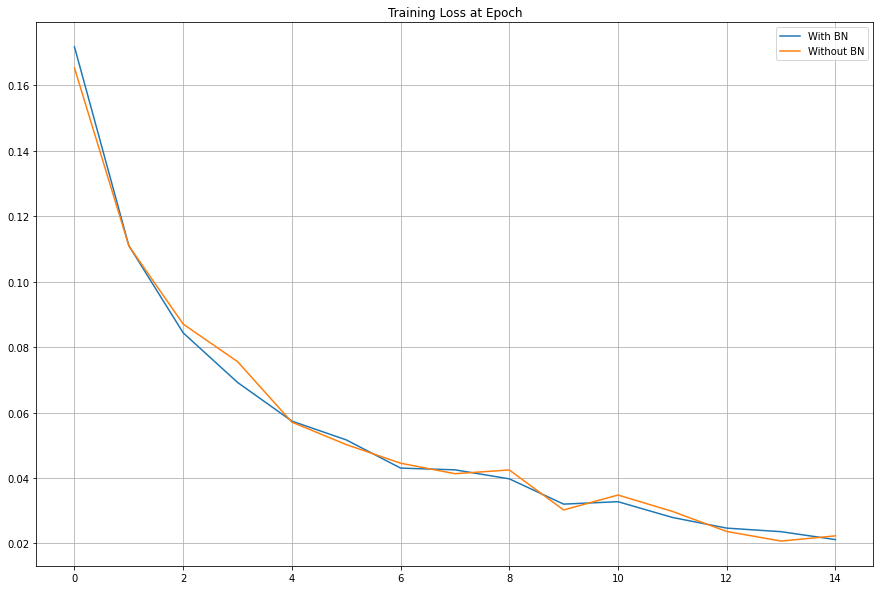

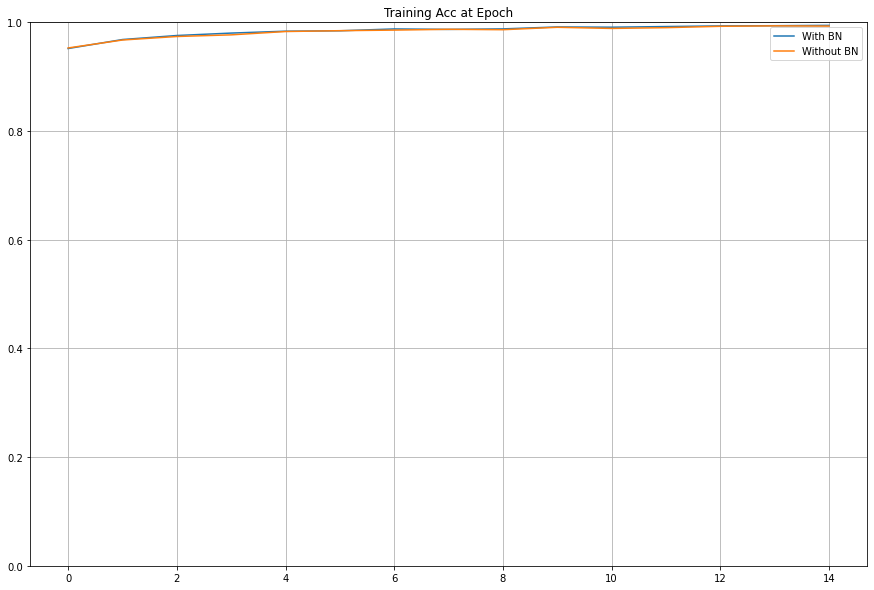

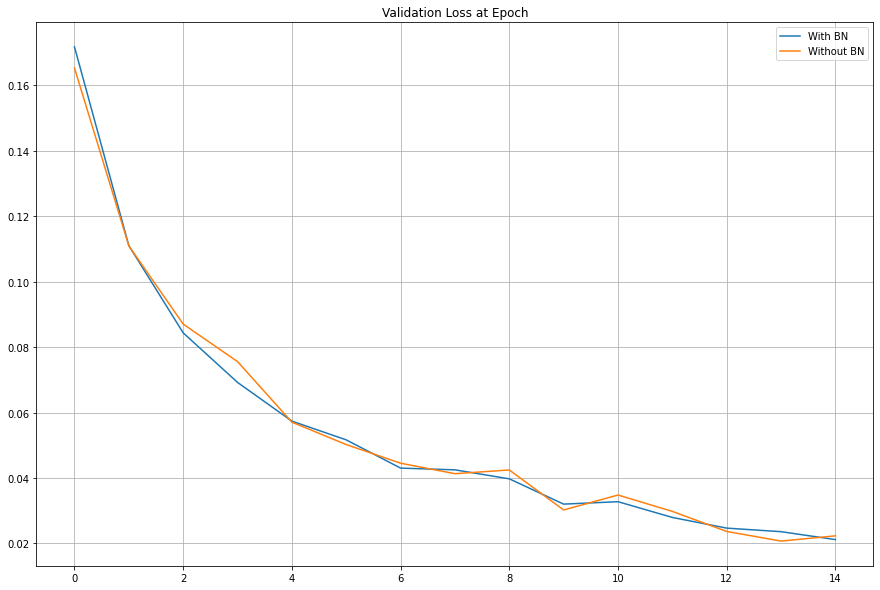

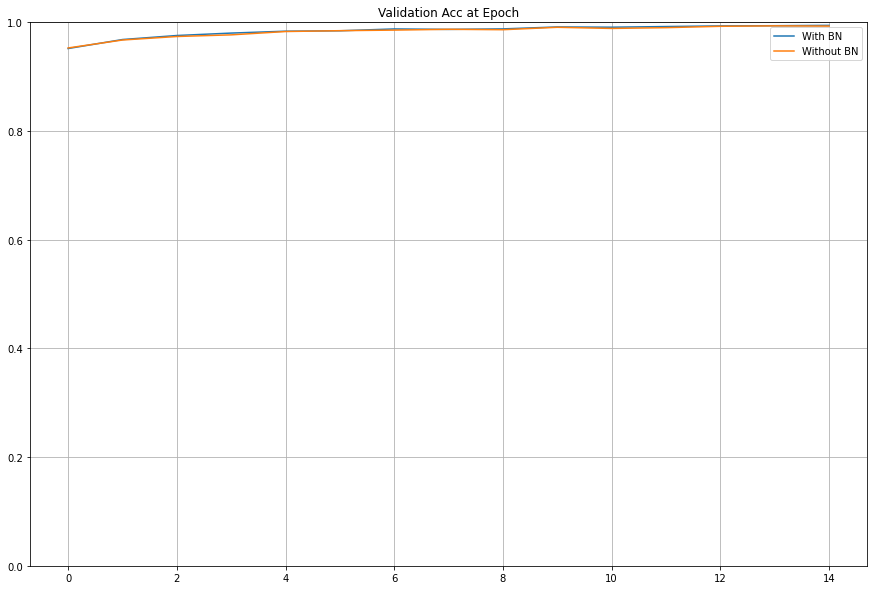

In [29]:

plot_compare(train_losses, title='Training Loss at Epoch')
plot_compare(train_accs, [0, 1.0], title='Training Acc at Epoch')
plot_compare(valid_losses, title='Validation Loss at Epoch')
plot_compare(valid_accs, [0, 1.0], title='Validation Acc at Epoch')